# Regression 

<div class="alert alert-block alert-info">
<ul><strong>
<li>MIGUEL DOMINGUEZ</li>
<li>CSC 59929</li>
<li>Machine Learning</li>
<li>Prof. Erik K. Grimmelmann </li>
<li>Date: 11/14/17 </li>
<li>Homework Week 10 </li>
</strong>
</ul>
</div>

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.ticker import MaxNLocator 
from matplotlib.colors import ListedColormap
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from astropy.table import Table, Column

## Discussion and Results:

<div class="alert alert-block alert-success">In this assigment we explore how regression works. We test different regression models using the Boston Housing Dataset. We start by analyzing the 14 features of the data. Since almost all features are continues we can plot them agaisnt each other and observe their correlations. Next time a heatmap of the correlation values is suggested. It can be observed that some unique pairs of features correlate with each other. The pair of features we picked is NOX and DIS. Nitric oxide is represented by NOX and DIS represents the distance to employment centers. From common thinking we can conluclude that employment centers are in heavily populated areas which are usually heavily polluted by smog, this means that Nitric oxide is more present the shorter the distance to an emplyment center. NOX will be used to train the regression models while DIS will be the feature to be predicted. The NOX and DIS features are divided into training, validation and testing data. The validation data will be used to obtain the predicted regression line and the testing is used to get the accuracy of the model. For our results we found that the Linear Regression, Ridge and Kernel Ridge are very similar when plotted and their accuracy is almost the same. However, for the svm Kernel Regression we had small difficulties plotting the graph and also fitting, which needs further reasearch on how to properly use the kernel for regression. In a similar way, the Lasso and Elastic Net provided regression lines that look almost flat, future parameter tweaks are needed. We conclude that regression is a powerful tool to use when making predictions about data rather than classifying it.  </div>

In [156]:
#Obtain Boston Housing Dataset and save it to a Pandas Frame
house = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header = None, sep='\s+')
#Rename columns
new_columns = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
house.columns = new_columns
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


<div class="alert alert-block alert-info"> <b>Boston Housing Dataser Atributes </b><br>
    <b>0. CRIM </b>     per capita crime rate by town <br>
    <b>1. ZN  </b>      proportion of residential land zoned for lots over 
                 25,000 sq.ft.<br>
    <b>2. INDUS </b>     proportion of non-retail business acres per town<br>
    <b>3. CHAS  </b>     Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)<br>
    <b>4. NOX </b>      nitric oxides concentration (parts per 10 million)<br>
    <b>5. RM  </b>      average number of rooms per dwelling<br>
    <b>6. AGE </b>      proportion of owner-occupied units built prior to 1940<br>
     <b>7. DIS </b>       weighted distances to five Boston employment centres<br>
     <b>8. RAD  </b>     index of accessibility to radial highways<br>
    <b> 9. TAX  </b>    full-value property-tax rate per 10000 dollars <br>
     <b>10. PTRATIO </b> pupil-teacher ratio by town <br>
     <b>11. B     </b>    1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town <br>
     <b>12. LSTAT </b>   The percetage lower status of the population <br>
     <b>13. MEDV </b>    Median value of owner-occupied homes in 1000 dollars</div>

## Plot all unique pairs of features

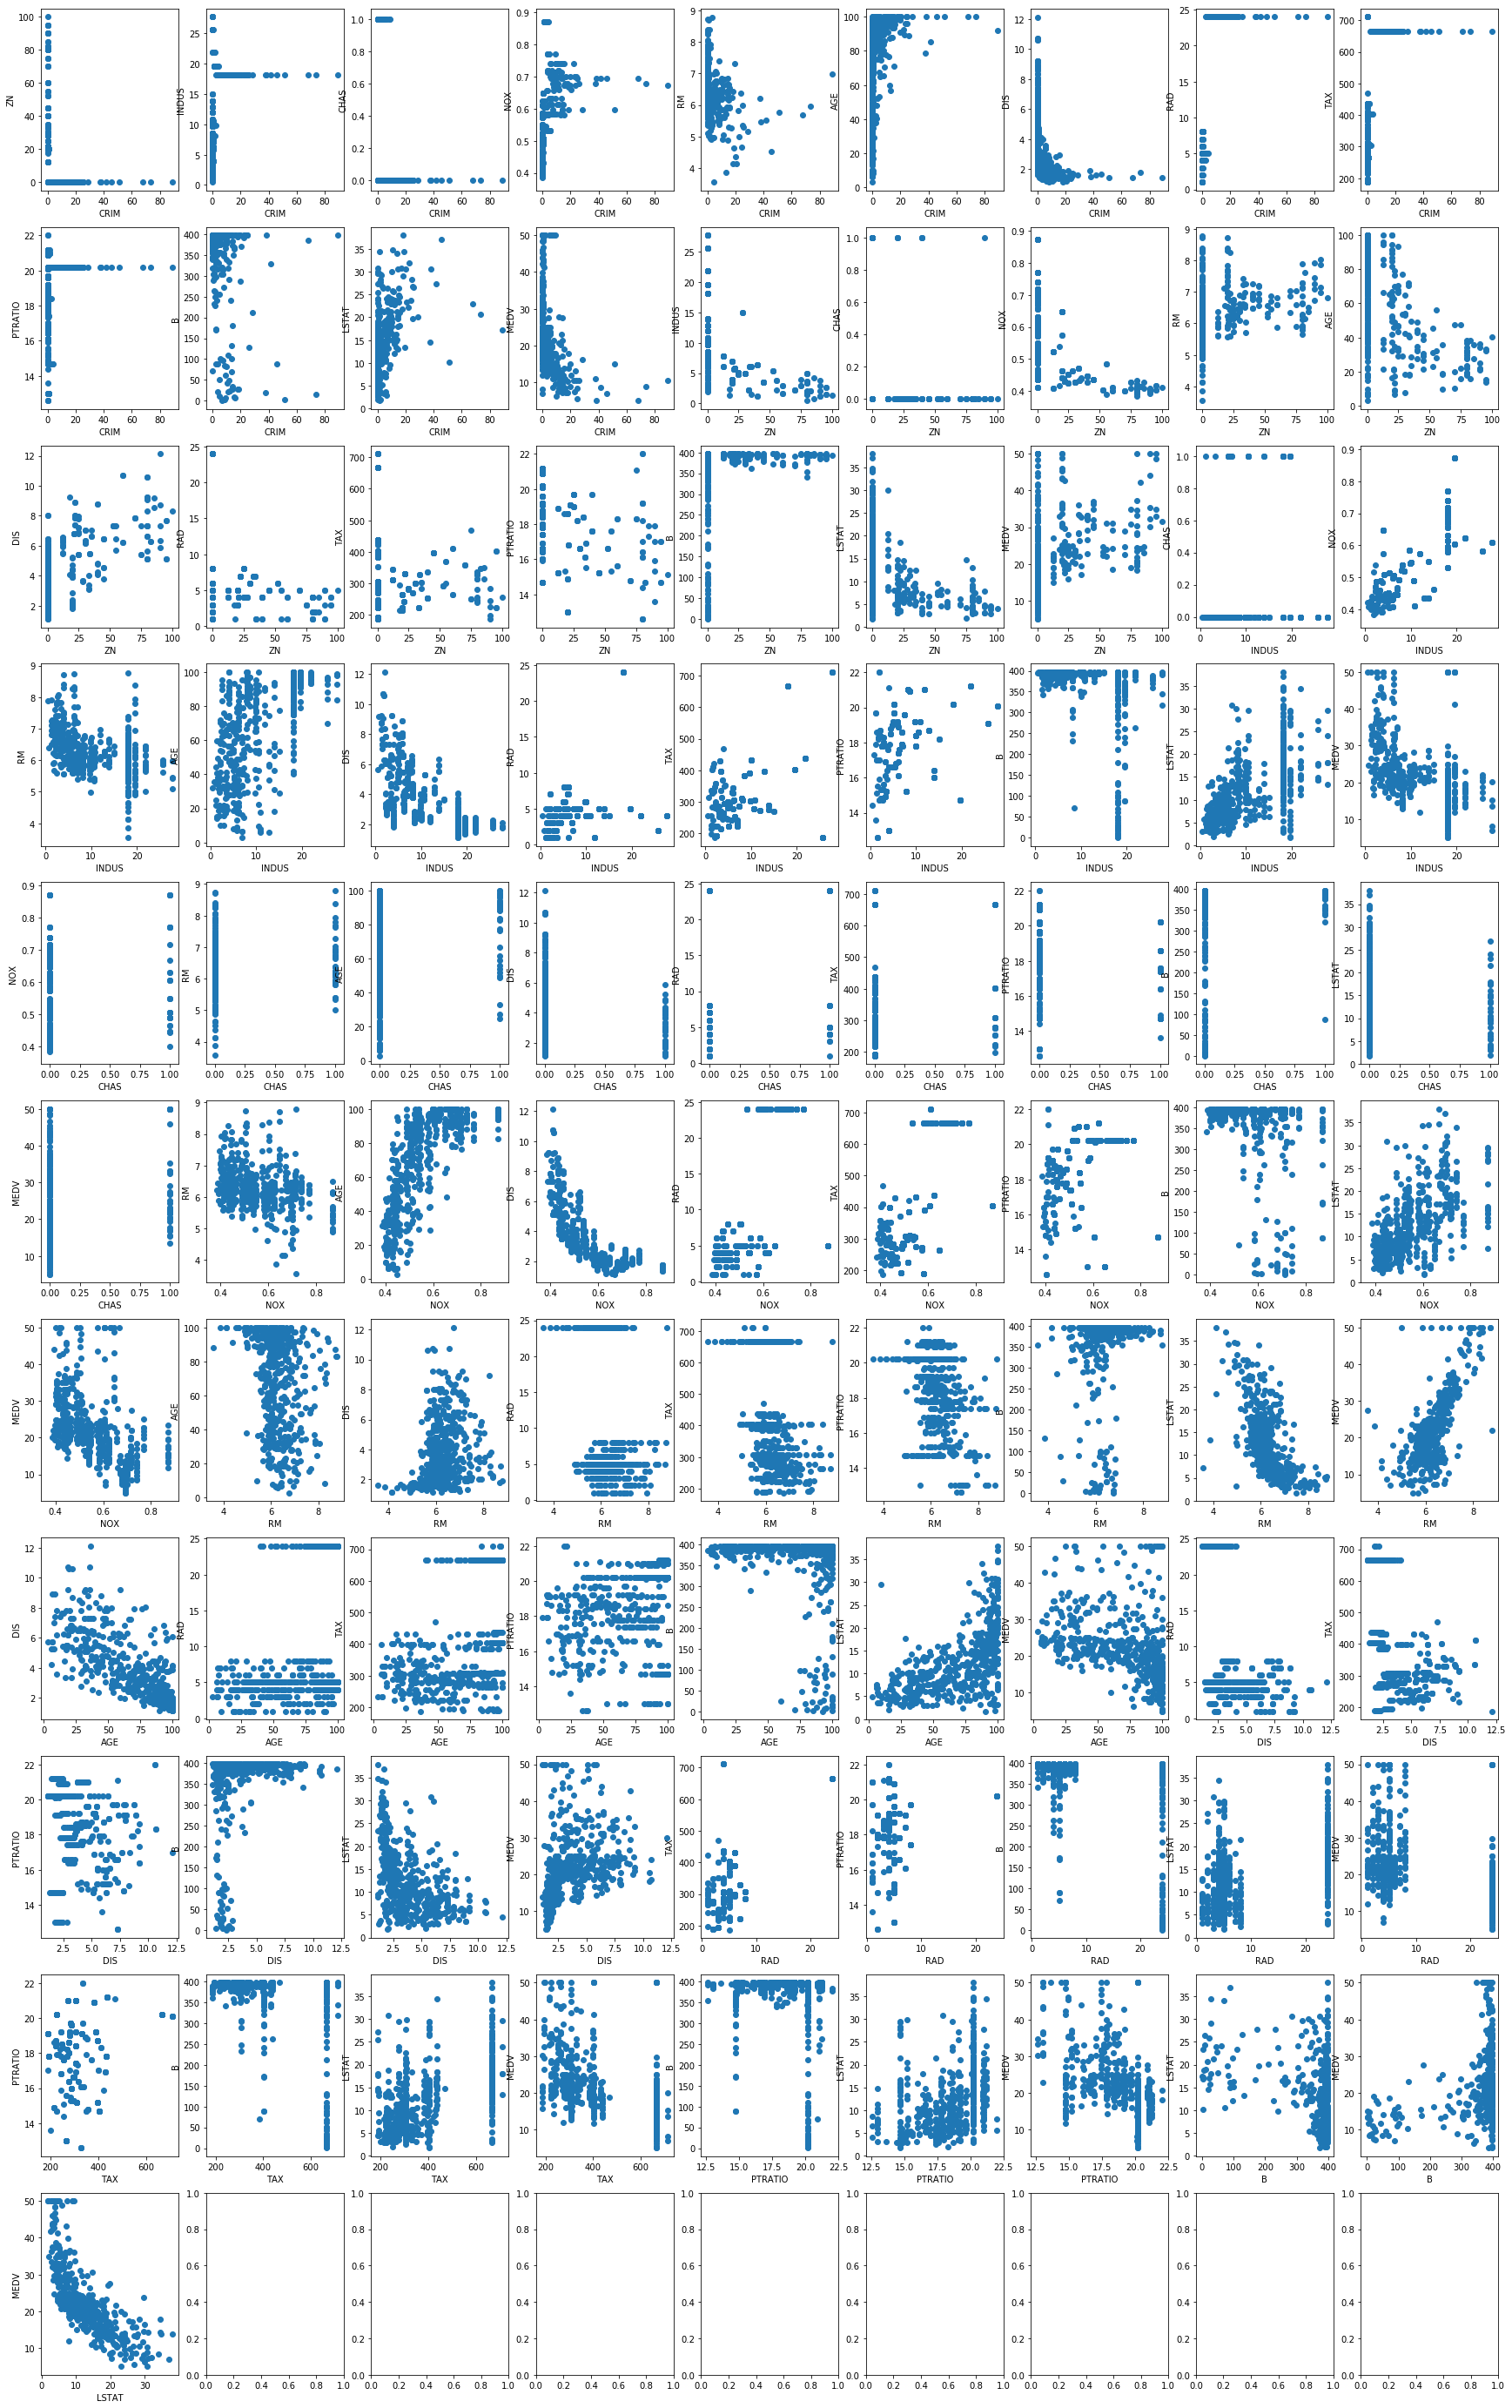

In [157]:
#Get numpy array from Datafram
X = house.iloc[:,:].values

#Helping lists to obtain unique pairs
num = new_columns
res = []
indx = []

for i in range(0,len(num)-1):
    for j in range(0,len(num)):
        tup = (num[i],num[j]) 
        inv = (num[j],num[i])
        ind = (i, j)
        value = (tup in  res) or (inv in res) or (i == j) #Check existence of pair
        if not value:
            res.append((num[i],num[j])) #Add pair to helper list
            indx.append(ind)
            
fig, ax = plt.subplots(nrows=11, ncols=9, figsize=(30,50))            
            
for pair, lab, ax in zip(indx,res,ax.ravel()):
    ax.scatter(X[:,pair[0]], X[:,pair[1]])
    ax.set_xlabel(lab[0])
    ax.set_ylabel(lab[1])
plt.show()

## Picked Pair: NOX nitric oxides concentration (parts per 10 million) Vs. DIS weighted distances to five Boston employment centres 

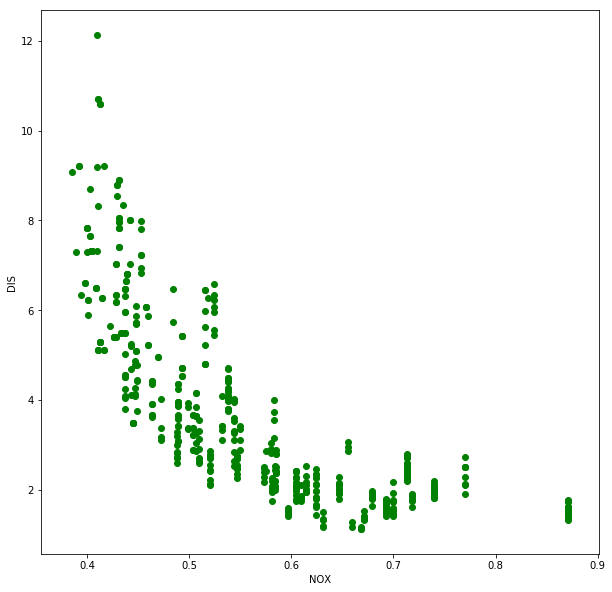

In [158]:
#Plot Pair of features to observer closely how they correlate
NOX = X[:,4]
DIS = X[:,7]

fig, ax = plt.subplots(figsize=(10,10))            
ax.scatter(NOX, DIS, color='green')
ax.set_xlabel("NOX")
ax.set_ylabel("DIS")
plt.show()

<div class="alert alert-block alert-success">Interesting! Well it does make sense that higher levels nitrogen oxide belong to densely populate areas which contain employment centers. Nitrogen oxide is a contributor to smog and city pollution. In other words, the closer you are to an employment center, the more air pollution you experience. Blame cars.</div>

## Separating Data into Training, Validation, Test (60%, 20%, 20%)

<div class="alert alert-block alert-warning">
<h2>Note</h2> <br>
 Here the dataset is splitted into three sets. Training is to train the models, Validation is to pick a model from
the many models being created, and Testing is to obtain the accuracy for the best model from the validation phase. This process is quite different from cross-validation. 
</div>

In [159]:
#Standardize the features
NOX = NOX.reshape(-1,1)
DIS = DIS.reshape(-1,1)
NOX = (NOX - NOX.mean()) / NOX.std()
DIS = (DIS - DIS.mean()) / DIS.std()

# Split data into 80% training and 20% test data from original NOX, DIS
from sklearn.model_selection import train_test_split
NOX_train, NOX_test, DIS_train, DIS_test = train_test_split(NOX, DIS, test_size=0.20, random_state=0)

#Split training data into 60% training and 20% validation from the original NOX, DIS
NOX_train, NOX_val, DIS_train, DIS_val = train_test_split(NOX_train, DIS_train, test_size=0.251, random_state=0)

<div class="alert alert-block alert-warning">
<h4>(60%, 20%, 20%)</h4> <br>
At this point NOX_train has 302 samples, NOX_val has 102 samples and NOX_test has 102 samples. Total samples in NOX is 506
</div>

## Applying Various Regression Methods

0.583530642871
0.583524353159
0.583511097057
0.736473055572
0.0
0.241204050235


C:\Users\Miguel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


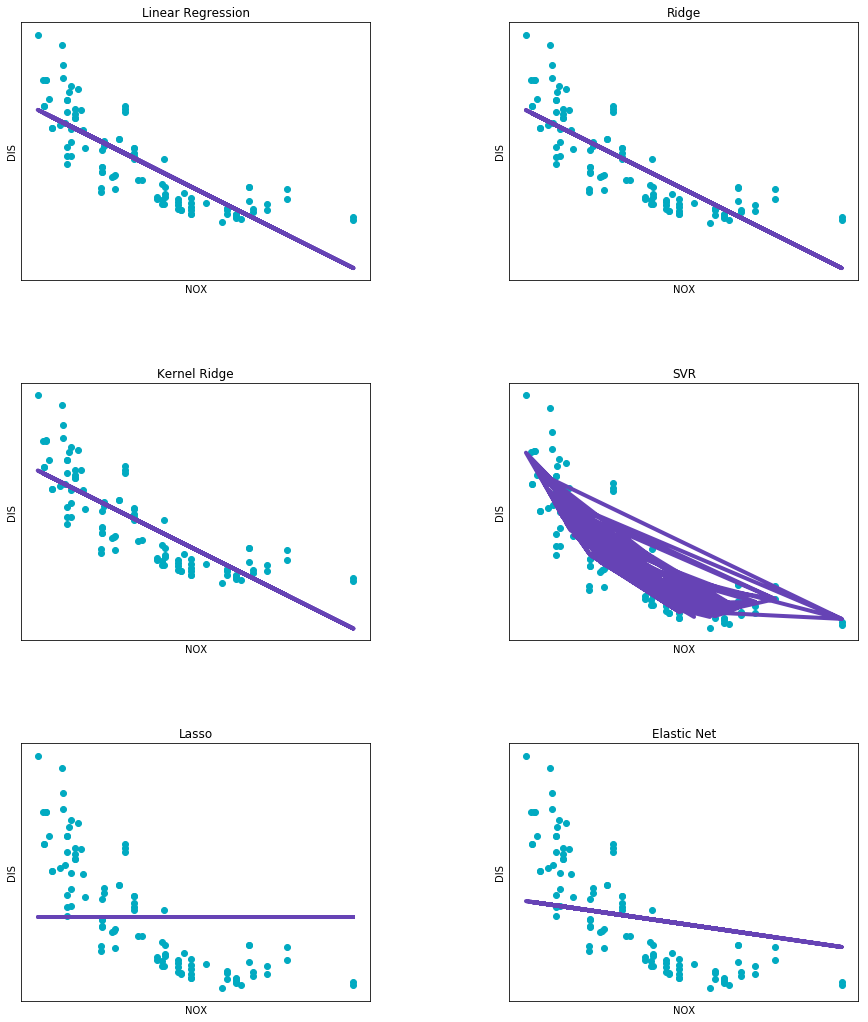

In [160]:
from sklearn import linear_model, svm, kernel_ridge

#Intances of models
models = (linear_model.LinearRegression(),
          linear_model.Ridge(),
          kernel_ridge.KernelRidge(),
          svm.SVR(),
          linear_model.Lasso(),
          linear_model.ElasticNet()
          )

#Train models
models = (clf.fit(NOX_train, DIS_train) for clf in models)

titles = ('Linear Regression',
          'Ridge',
          'Kernel Ridge',
          'SVR',
          'Lasso',
          'Elastic Net') 

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(nrows=3, ncols=2, figsize= (15,18))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

accuracy_test = []


for regr, title, ax in zip(models, titles, sub.flatten()):
    accuracy_test.append(np.around(regr.score(NOX_test,DIS_test),decimals =4))
    print(regr.score(NOX_train,DIS_train))
    
    DIS_test_predicted = regr.predict(NOX_test)
    
    DIS_predicted = regr.predict(NOX_val)

    ax.scatter(NOX_val, DIS_val, color="#01AAC1")
    ax.plot(NOX_val, DIS_predicted, color='#6643B5', linewidth=4)
    ax.set_xlabel('NOX')
    ax.set_ylabel('DIS')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.show()

In [161]:
def barchart(model_accuracy, model_title,optext):
    """Plot bars for accuracy for each model.
    
    Parameters
    ----------
    model_accuracy: list of float accuracy values
    model_title: list of names for each model
    optext: optional string that is part of plot graph
    """
    width = 0.75
    ind = np.arange(6)
    fig, ax = plt.subplots(figsize=(20,15))
    colors = ['#DEB887','#A1EAFB','#CFEE91','#FFFF99','#49BEB7','#F0DC82']
    bars = ax.bar([0,1,2,3,4,5], model_accuracy , width, color=colors)

    #Add some text for labels, title and axes ticks
    ax.set_xlabel("Models",fontsize=20)
    ax.set_ylabel('Accuracy',fontsize=20)
    ax.set_title('Regression Models and their Accuracy' + optext,fontsize=35)
    ax.set_xticks(ind) #Positioning on the x axis
    ax.set_xticklabels(range(0,6),
                      fontsize = 20)
    ax.legend(bars,model_title, loc= 'upper center',fontsize=25)

    def autolabel(rects,fontsize=20):
        """
        Attach a text label above each bar displaying its height
        """
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., 1*height,height,
                    ha='center', va='bottom',fontsize=fontsize)
    autolabel(bars)
    plt.ylim([0,2])
    plt.show()

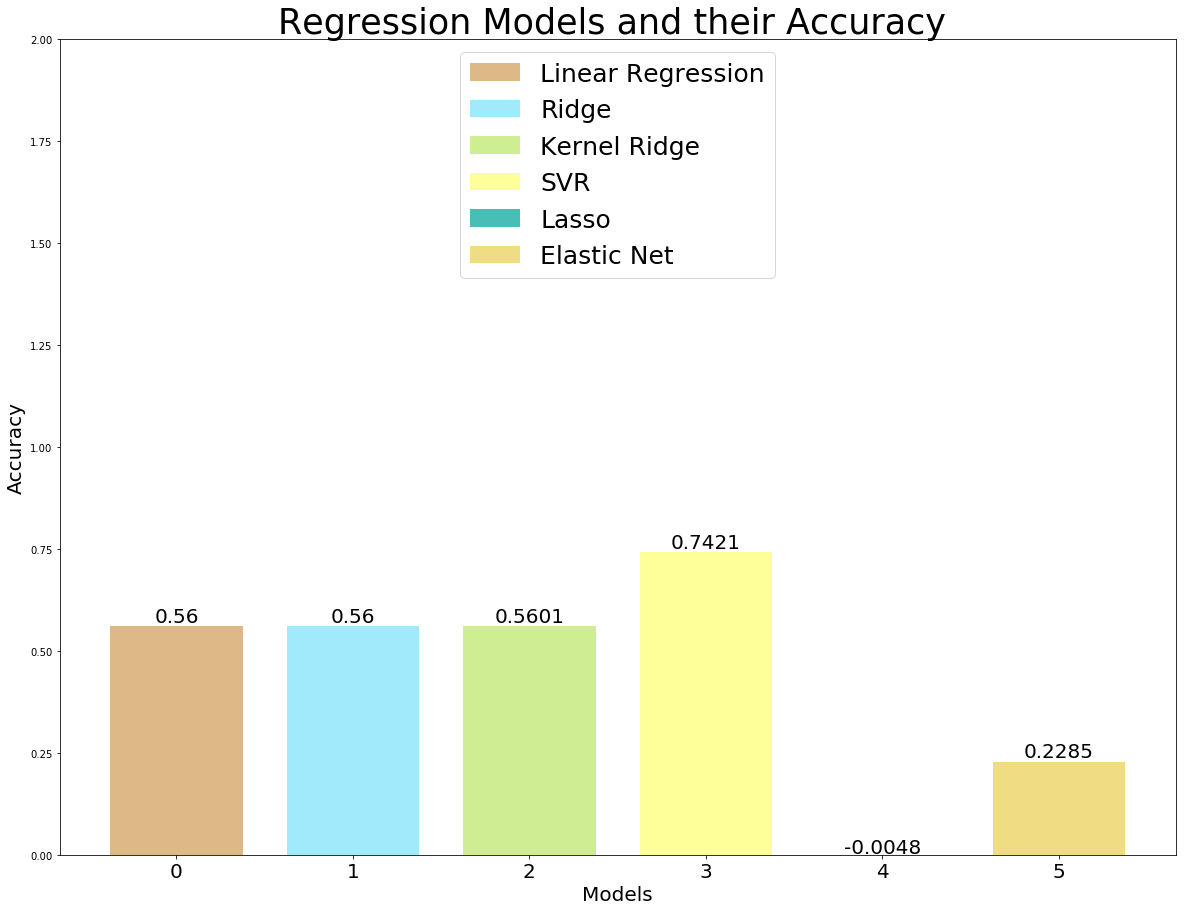

In [162]:
barchart(accuracy_test,titles," ")